<a href="https://colab.research.google.com/github/gingerchien/ML-Intro/blob/main/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Necessary Libraries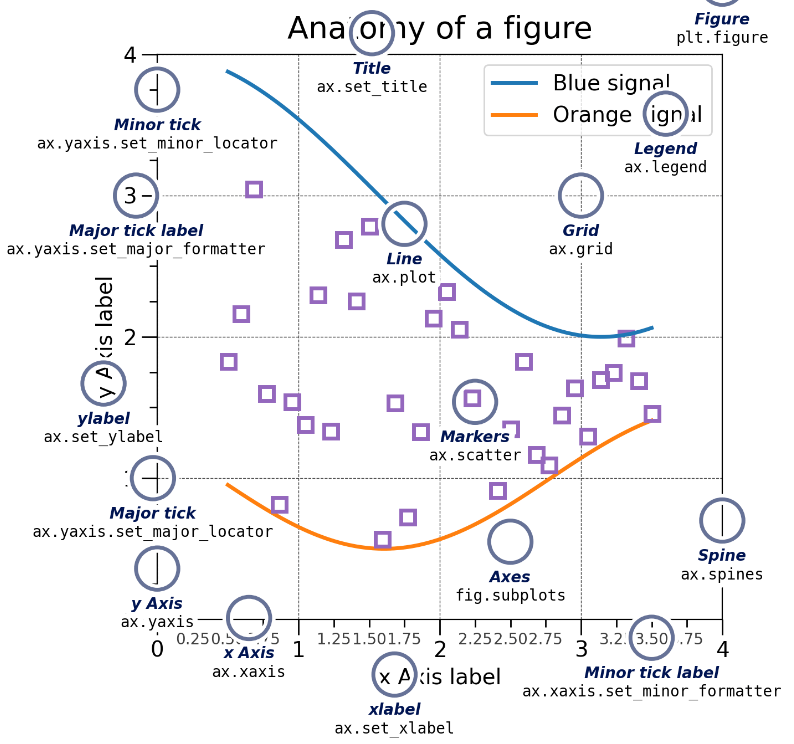

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

### Simple Example
Matplotlib graphs data on Figures (e.g., windows, Jupyter widgets, etc.), each of which can contain one or more Axes, an area where points can be specified in terms of x-y coordinates (or theta-r in a polar plot, x-y-z in a 3D plot, etc.). The simplest way of creating a Figure with an Axes is using pyplot.subplots. We can then use Axes.plot to draw some data on the Axes:

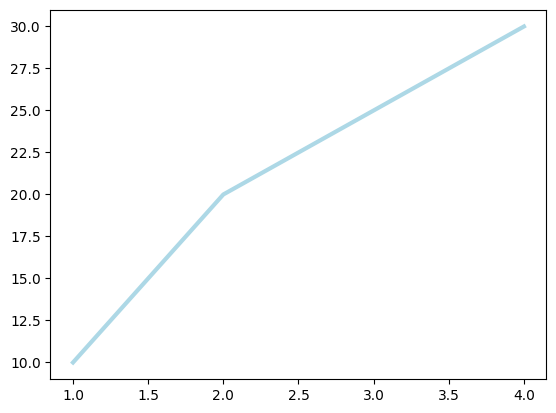

In [4]:
fig, ax = plt.subplots() #create a figure containing a single axes
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3) #plot some data on the axes
plt.show() #depending on backend may need to call this to show plot

# Figure
The whole figure. The Figure keeps track of all the child Axes, a group of 'special' Artists (titles, figure legends, colorbars, etc), and even nested subfigures.It is often convenient to create the Axes together with the Figure, but you can also manually add Axes later on. Note that many Matplotlib backends support zooming and panning on figure windows.

The easiest way to create a new Figure is with pyplot:

<Figure size 640x480 with 0 Axes>

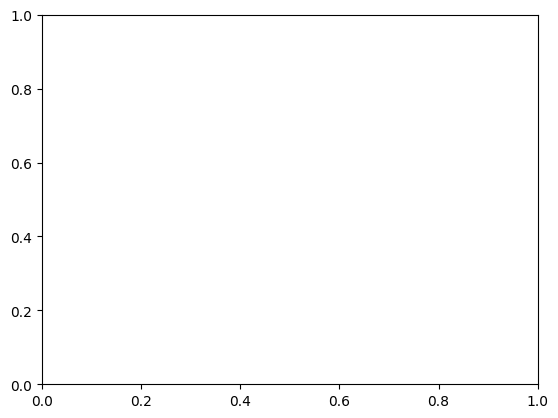

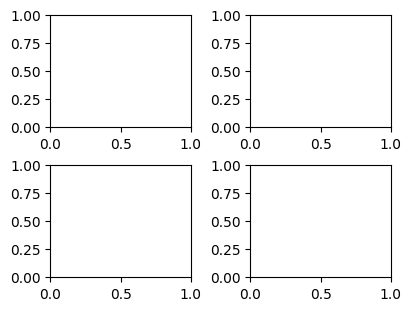

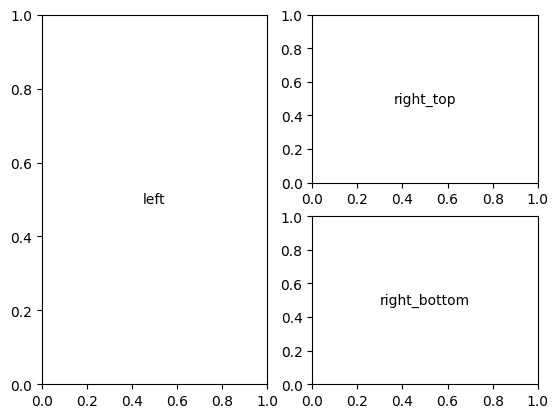

In [10]:
fig = plt.figure() #an empty figure with no Axes
fig, ax = plt.subplots() #create a figure containing a single axes
fig, axs = plt.subplots(2, 2, figsize=(4,3), layout='constrained') #create figure and axes in a 2x2 grid
#more complex grids like a figure with one axes on the left, and two on the right can be done with subplot_mosaic:
fig, axs = plt.subplot_mosaic([['left','right_top'], ['left','right_bottom']])
for ax_name, ax in axs.items():
    ax.text(0.5, 0.5, ax_name, ha='center', va='center')

## Intro to Figures
When looking at Matplotlib visualization, you are almost always looking at Artists placed on a Figure. In the example above, the figure is the blue region and add_subplot has added an Axes artist to the Figure (see Parts of a Figure). A more complicated visualization can add multiple Axes to the Figure, colorbars, legends, annotations, and the Axes themselves can have multiple Artists added to them (e.g. ax.plot or ax.imshow).

Text(0.0, 1.0, 'Axes')

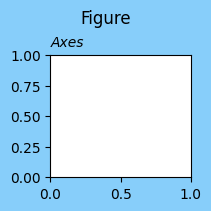

In [8]:
fig = plt.figure(figsize=(2,2), facecolor='lightskyblue',
                 layout = 'constrained')
fig.suptitle('Figure')
ax = fig.add_subplot()
ax.set_title('Axes', loc='left', fontstyle='oblique', fontsize='medium')

Sometimes we want to have a nested layout in a Figure, with two or more sets of Axes that do not share the same subplot grid. We can use add_subfigure or subfigures to create virtual figures inside a parent Figure; see Figure subfigures for more details.

Text(0.5, 0.98, 'Right subfigure')

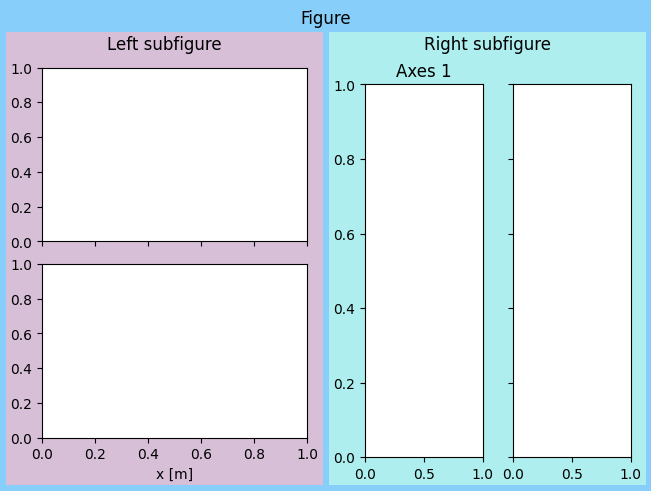

In [12]:
fig = plt.figure(layout='constrained', facecolor='lightskyblue')
fig.suptitle('Figure')
figL, figR = fig.subfigures(1,2)
figL.set_facecolor('thistle')
axL = figL.subplots(2,1, sharex=True)
axL[1].set_xlabel('x [m]')
figL.suptitle('Left subfigure')
figR.set_facecolor('paleturquoise')
axR = figR.subplots(1,2,sharey=True)
axR[0].set_title('Axes 1')
figR.suptitle('Right subfigure')

The Figure size on the screen is set by figsize and dpi. figsize is the (width, height) of the Figure in inches (or, if preferred, units of 72 typographic points). dpi are how many pixels per inch the figure will be rendered at. To make your Figures appear on the screen at the physical size you requested, you should set dpi to the same dpi as your graphics system. Note that many graphics systems now use a "dpi ratio" to specify how many screen pixels are used to represent a graphics pixel. Matplotlib applies the dpi ratio to the dpi passed to the figure to make it have higher resolution, so you should pass the lower number to the figure.

The facecolor, edgecolor, linewidth, and frameon options all change the appearance of the figure in expected ways, with frameon making the figure transparent if set to False.

Finally, the user can specify a layout engine for the figure with the layout parameter. Currently Matplotlib supplies "constrained", "compressed" and "tight" layout engines. These rescale axes inside the Figure to prevent overlap of ticklabels, and try and align axes, and can save significant manual adjustment of artists on a Figure for many common cases.

## Saving Figures

Figures can be saved to disk using the savefig method. fig.savefig('MyFigure.png', dpi=200) will save a PNG formatted figure to the file MyFigure.png in the current directory on disk with 200 dots-per-inch resolution. Note that the filename can include a relative or absolute path to any place on the file system.

Many types of output are supported, including raster formats like PNG, GIF, JPEG, TIFF and vector formats like PDF, EPS, and SVG.

By default, the size of the saved Figure is set by the Figure size (in inches) and, for the raster formats, the dpi. If dpi is not set, then the dpi of the Figure is used. Note that dpi still has meaning for vector formats like PDF if the Figure includes Artists that have been rasterized; the dpi specified will be the resolution of the rasterized objects.

In [14]:
fig.savefig('MyFigure.png', dpi=200)

#Axes
An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) that provide ticks and tick labels to provide scales for the data in the Axes. Each Axes also has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

The Axes class and its member functions are the primary entry point to working with the OOP interface, and have most of the plotting methods defined on them (e.g. ax.plot(), shown above, uses the plot method)


# Axis
These objects set the scale and limits and generate ticks (the marks on the Axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

# Artist
Basically, everything visible on the Figure is an Artist (even Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collections objects, Patch objects, etc. When the Figure is rendered, all of the Artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

# Types of inputs to plotting functions
Plotting functions expect numpy.array or numpy.ma.masked_array as input, or objects that can be passed to numpy.asarray. Classes that are similar to arrays ('array-like') such as pandas data objects and numpy.matrix may not work as intended. Common convention is to convert these to numpy.array objects prior to plotting. For example, to convert a numpy.matrix

In [15]:
b = np.matrix([[1, 2, 3], [4, 5, 6]])
b_asarray = np.asarray(b)

Most methods will also parse a string-indexable object like a dict, a structured numpy array, or a pandas.DataFrame. Matplotlib allows you to provide the data keyword argument and generate plots passing the strings corresponding to the x and y variables.

Text(0, 0.5, 'entry b')

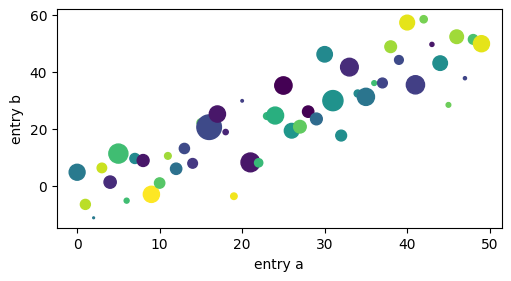

In [16]:
np.random.seed(19680801) #seed the random number generator
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig,ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

# Coding Styles
2 ways to use Matplotlib:

* explicitly create Figures and Axes, and call methods on them (the OO style)
* rely on pyplot to implicitly create and manage the Figures and Axes, and use pyplot functions for plotting

## OO Style

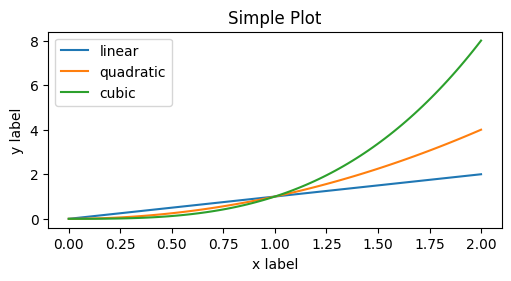

In [18]:
x = np.linspace(0, 2, 100) #sample data

#even in the OO-style, use .pyplot.figure to create the Figure
fig, ax = plt.subplots(figsize=(5,2.7), layout='constrained')
ax.plot(x,x,label='linear') #Plot some data on the axes
ax.plot(x, x**2, label='quadratic') #Plot more data on the axes
ax.plot(x, x**3, label='cubic') #Plot more data on the axes
ax.set_xlabel('x label') # add x label
ax.set_ylabel('y label') # add y label
ax.set_title("Simple Plot") # add title
ax.legend() #add legend

## Pyplot Style

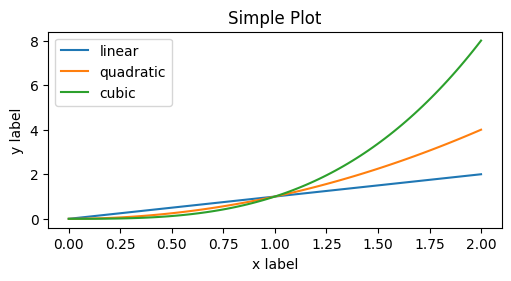

In [19]:
x = np.linspace(0, 2, 100) #sample data

plt.figure(figsize=(5,2.7), layout='constrained')
plt.plot(x,x,label='linear') #Plot some data on the axes
plt.plot(x, x**2, label='quadratic') #Plot more data on the axes
plt.plot(x, x**3, label='cubic') #Plot more data on the axes
plt.xlabel('x label') # add x label
plt.ylabel('y label') # add y label
plt.title("Simple Plot") # add title
plt.legend() #add legend